In this program "exploration.ipy" I did  data analysis on "Falcon 9 and Falcon Heavy Launches Records from Wikipedia" which I scraped out.I did frequency analysis, their relation analysis and many more. Now, let's begin this.

## Importing Dependencies

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giving the URL path 
# Reading the csv file

In [52]:
path = "/content/drive/MyDrive/web_scraping/spacex_web_scraped.csv"
df = pd.read_csv(path)

## Visualising dataframe

In [53]:
print(df.head(5))
print(df.columns)
df.shape

   Flight No. Launch site                               Payload Payload mass  \
0           1       CCAFS  Dragon Spacecraft Qualification Unit            0   
1           2       CCAFS                                Dragon            0   
2           3       CCAFS                                Dragon       525 kg   
3           4       CCAFS                          SpaceX CRS-1     4,700 kg   
4           5       CCAFS                          SpaceX CRS-2     4,877 kg   

  Orbit Customer Launch outcome             Date   Time  
0   LEO   SpaceX      Success\n      4 June 2010  18:45  
1   LEO     NASA        Success  8 December 2010  15:43  
2   LEO     NASA        Success      22 May 2012  07:44  
3   LEO     NASA      Success\n   8 October 2012  00:35  
4   LEO     NASA      Success\n     1 March 2013  15:10  
Index(['Flight No.', 'Launch site', 'Payload', 'Payload mass', 'Orbit',
       'Customer', 'Launch outcome', 'Date', 'Time'],
      dtype='object')


(121, 9)

## Describing the Dataframe

In [54]:
df.describe()

,Flight No.
count,121.000000
mean,47.859504
std,32.497001
min,1.000000
25%,16.000000
50%,46.000000
75%,76.000000
max,106.000000


## checking missing any data 

In [55]:
df.isna().sum()

Flight No.        0
Launch site       0
Payload           0
Payload mass      0
Orbit             0
Customer          0
Launch outcome    0
Date              0
Time              0
dtype: int64

## Dublicate the dataframe

In [56]:
df = df.loc[~df.duplicated(subset=['Flight No.', 'Launch site', 'Payload', 'Payload mass', 'Orbit',
       'Customer', 'Launch outcome', 'Date', 'Time'])].reset_index(drop=True)

# Visualising data volume w.r.t categories

### Count the frequency of Launch site data category

In [57]:
df["Launch site"].value_counts()

CCAFS             45
KSC               27
Cape Canaveral    25
VAFB              17
CCSFS              3
Name: Launch site, dtype: int64

### Plottting the Launch site data categories and their counts

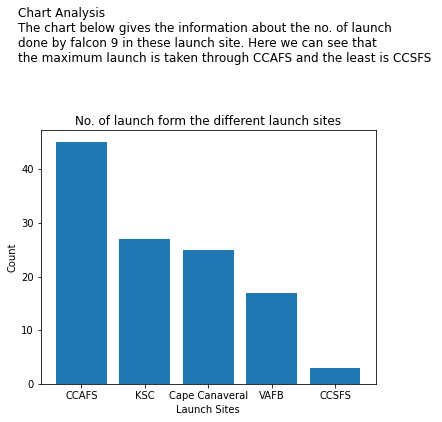

In [58]:
launch_outcome_count = df['Launch site'].value_counts()
plt.bar(launch_outcome_count.index, launch_outcome_count.values)

plt.title('No. of launch form the different launch sites')
plt.xlabel('Launch Sites')
plt.ylabel('Count')
desc = f'Chart Analysis \nThe chart below gives the information about the no. of launch \ndone by falcon 9 in these launch site. Here we can see that \nthe maximum launch is taken through CCAFS and the least is CCSFS '
plt.text(-1,60,desc, ha='left',va='baseline',fontsize="large")
plt.subplots_adjust(bottom=0)
plt.show()

# Count the frequency of Payload data category

In [59]:
df["Payload"].value_counts()

Starlink         17
Iridium NEXT      8
Orbcomm-OG2       3
GPS III           3
Dragon            3
                 ..
SES-11            1
SpaceX CRS-13     1
Zuma              1
GovSat-1          1
Transporter-1     1
Name: Payload, Length: 79, dtype: int64

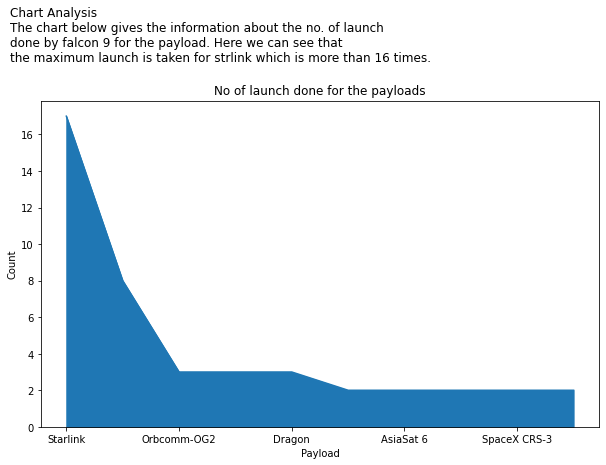

In [60]:
ax = df["Payload"].value_counts().head(10).plot(kind = 'area', title="No of launch done for the payloads",figsize=(10,6),xlabel=("Payload"),ylabel=("Count"))
desc = f'Chart Analysis \nThe chart below gives the information about the no. of launch \ndone by falcon 9 for the payload. Here we can see that \nthe maximum launch is taken for strlink which is more than 16 times.  '
chart_Analysis = ax.text(-1,20,desc, ha='left',va='baseline',fontsize="large")

### Count the frequency of Payload mass data category

In [61]:
df["Payload mass"].value_counts()

15,600 kg    13
9,600 kg      7
0             3
C             3
2,395 kg      2
             ..
4,230 kg      1
2,150 kg      1
6,092 kg      1
2,647 kg      1
~5,000 kg     1
Name: Payload mass, Length: 81, dtype: int64

## Plottting the payload mass data categories and their counts

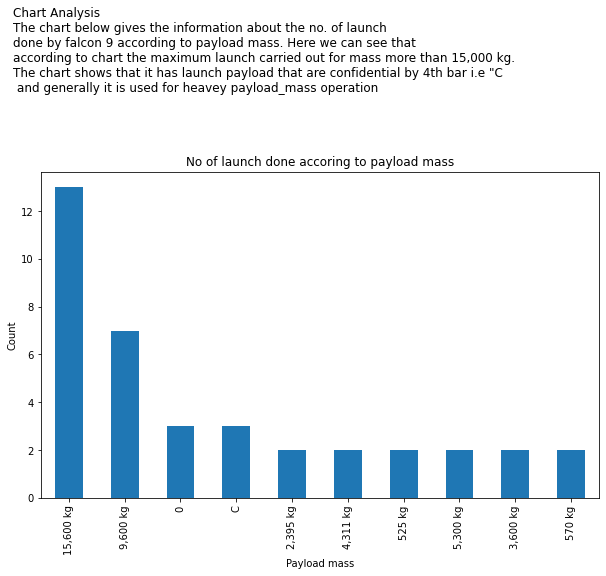

In [62]:
ax = df["Payload mass"].value_counts().head(10).plot(kind = 'bar', title="No of launch done accoring to payload mass",figsize=(10,6),xlabel=("Payload mass"),ylabel=("Count"))
desc = f'Chart Analysis \nThe chart below gives the information about the no. of launch \ndone by falcon 9 according to payload mass. Here we can see that \naccording to chart the maximum launch carried out for mass more than 15,000 kg. \nThe chart shows that it has launch payload that are confidential by 4th bar i.e "C \n and generally it is used for heavey payload_mass operation'
chart_Analysis = ax.text(-1,17,desc, ha='left',va='baseline',fontsize="large")

### Count the frequency of Orbit data category

In [63]:
df["Orbit"].value_counts()

LEO            59
GTO            35
Polar           7
SSO             7
HEO             3
MEO             3
Polar orbit     2
Sub-orbital     1
Name: Orbit, dtype: int64

## Plottting the orbit data categories and their counts

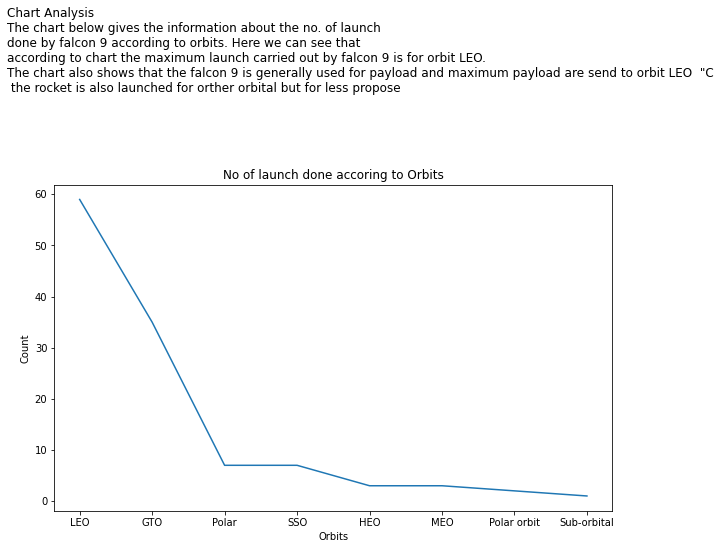

In [64]:
ax = df["Orbit"].value_counts().head(10).plot(kind = 'line', title="No of launch done accoring to Orbits",figsize=(10,6),xlabel=("Orbits"),ylabel=("Count"))
desc = f'Chart Analysis \nThe chart below gives the information about the no. of launch \ndone by falcon 9 according to orbits. Here we can see that \naccording to chart the maximum launch carried out by falcon 9 is for orbit LEO. \nThe chart also shows that the falcon 9 is generally used for payload and maximum payload are send to orbit LEO  "C \n the rocket is also launched for orther orbital but for less propose'
chart_Analysis = ax.text(-1,80,desc, ha='left',va='baseline',fontsize="large")

### Count the frequency of customers data category

In [65]:
df["Customer"].value_counts()

NASA                                  34
SpaceX                                19
Iridium Communications                 8
SES                                    6
USAF                                   4
Thaicom                                3
Orbcomm                                3
AsiaSat                                3
ABS                                    3
CONAE                                  2
NRO                                    2
Telesat                                2
SKY Perfect JSAT Group                 2
MDA                                    2
Telkom Indonesia                       1
Republic of Korea Army                 1
U.S. Space Force                       1
Sky Perfect JSAT                       1
Spacecom                               1
Canadian Space Agency                  1
Sirius XM                              1
PSN                                    1
Spaceflight Industries                 1
Es'hailSat                             1
USSF            

## Plottting the customers data categories and their counts

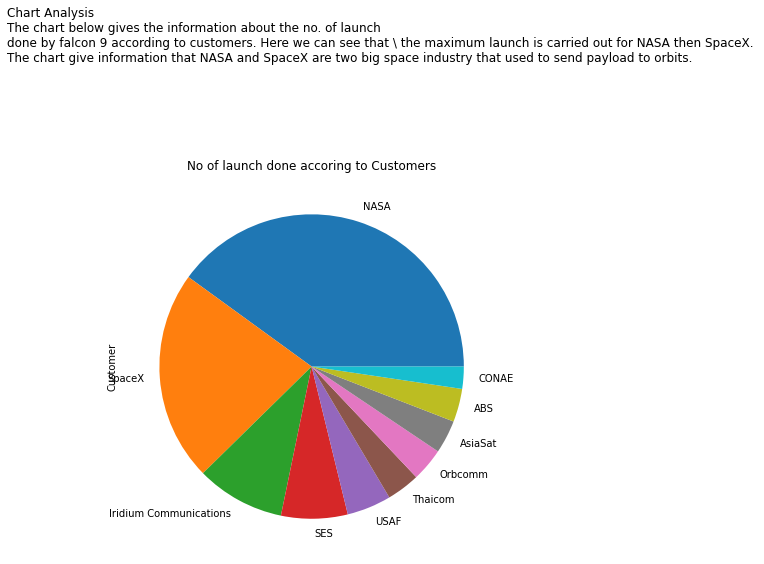

In [66]:
ax = df["Customer"].value_counts().head(10).plot(kind = 'pie', title="No of launch done accoring to Customers",figsize=(10,7))
desc = f'Chart Analysis \nThe chart below gives the information about the no. of launch \ndone by falcon 9 according to customers. Here we can see that \ the maximum launch is carried out for NASA then SpaceX. \nThe chart give information that NASA and SpaceX are two big space industry that used to send payload to orbits.'
chart_Analysis = ax.text(-2,2,desc, ha='left',va='baseline',fontsize="large")

## Visulazition on Payload mass vs Launch site

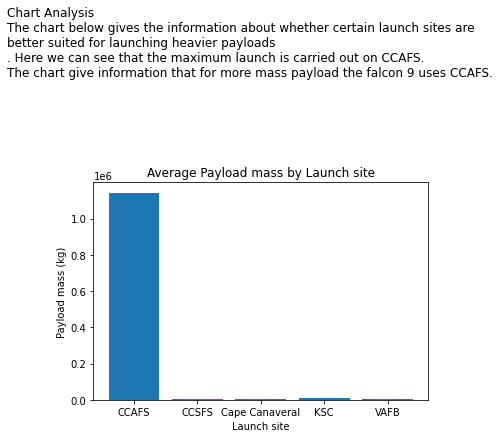

In [114]:
# convert payload mass to numeric format
# Check if 'Payload mass' column exists in the dataframe before converting to numeric format
if 'Payload mass' in df.columns:
    # Check if any commas are present in the 'Payload mass' column and remove them
    if ',' in df['Payload mass']:
        df['Payload mass'] = df['Payload mass'].str.replace(',', '')
    # Check if the ' kg' string is present in the 'Payload mass' column and remove it
    if ' kg' in df['Payload mass']:
        df['Payload mass'] = df['Payload mass'].str.replace(' kg', '')
    # Check if the 'kg' string is directly adjacent to the number in the 'Payload mass' column and remove it
    if 'kg' in df['Payload mass']:
        df['Payload mass'] = df['Payload mass'].str.replace('kg', '')
    # Try to convert the 'Payload mass' column to numeric format
    try:
        df['Payload mass'] = pd.to_numeric(df['Payload mass'])
    # Handle the case where the conversion fails by setting the value to NaN
    except ValueError:
        df['Payload mass'] = pd.to_numeric(df['Payload mass'], errors='coerce')

# create a bar chart
grouped = df.groupby(['Launch site'])['Payload mass'].mean().reset_index()
ax = plt.bar(grouped['Launch site'], grouped['Payload mass'])
plt.title('Average Payload mass by Launch site')
plt.xlabel('Launch site')
plt.ylabel('Payload mass (kg)')
# Add text inside the chart
desc = f'Chart Analysis \nThe chart below gives the information about whether certain launch sites are \nbetter suited for launching heavier payloads \n. Here we can see that the maximum launch is carried out on CCAFS. \nThe chart give information that for more mass payload the falcon 9 uses CCAFS.'
plt.text(-2,1785040,desc, ha='left',va='baseline',fontsize="large")
# plt.text(6,500,'This is some text', ha='left', va='baseline',fontsize="large")
plt.show()
